In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural,stopwords

Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

file_id = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# find the number of character , words and sentences for the mentioned documents

In [5]:
result_data = pd.DataFrame(index=file_id,columns=['no_char','no_words','no_sents'])

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
for i in file_id:
  result_data.loc[i,'no_char'] = len(inaugural.raw(i)) # count of characters
  result_data.loc[i,'no_words'] = len([j for j in inaugural.words(i) if j[0].isalpha()]) # count words, exclude
  result_data.loc[i,'no_sents'] = len(inaugural.sents(i)) # count of Sentences

In [8]:
result_data

,no_char,no_words,no_sents
1941-Roosevelt.txt,7571,1346,68
1961-Kennedy.txt,7618,1367,52
1973-Nixon.txt,9991,1816,69


Remove all the stop words from all the 3 speeches

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def remove_stop(text):
  text=re.sub(r'[,--:\'\d]','',text) # using regular expression (RegEx) to remove punctuations
  new_text=''
  for i in text.split():
    if i.lower() not in stopwords.words('english'):
      new_text = new_text+' '+i.lower()

  return(new_text)


In [11]:
len(stopwords.words('english'))

179

In [12]:
Nixon_new = remove_stop(Nixon)
Kennedy_new = remove_stop(Kennedy)
Roosevelt_new = remove_stop(Roosevelt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Possible set difference at position 2
  


In [13]:
Nixon[:200]

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America wa'

In [14]:
Nixon_new[:200]

' mr. vice president mr. speaker mr. chief justice senator cook mrs. eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly en'

***Which word occurs the most number of times in his inaugural address for each president? Mention the top three words***

In [15]:
result_data.loc['1973-Nixon.txt','most_repeat'] = pd.Series(Nixon_new.split()).value_counts().index[0]
result_data.loc['1961-Kennedy.txt','most_repeat'] = pd.Series(Kennedy_new.split()).value_counts().index[0]
result_data.loc['1941-Roosevelt.txt','most_repeat'] = pd.Series(Roosevelt_new.split()).value_counts().index[0]

In [16]:
result_data

,no_char,no_words,no_sents,most_repeat
1941-Roosevelt.txt,7571,1346,68,know
1961-Kennedy.txt,7618,1367,52,let
1973-Nixon.txt,9991,1816,69,us


***Mention the top three words***

In [17]:
result_data.loc['1973-Nixon.txt','top_3'] = str([i for i in pd.Series(Nixon_new.split()).value_counts().index[0:3]])
result_data.loc['1961-Kennedy.txt','top_3'] = str([i for i in pd.Series(Kennedy_new.split()).value_counts().index[0:3]])
result_data.loc['1941-Roosevelt.txt','top_3'] = str([i for i in pd.Series(Roosevelt_new.split()).value_counts().index[0:3]])

In [18]:
result_data

,no_char,no_words,no_sents,most_repeat,top_3
1941-Roosevelt.txt,7571,1346,68,know,"['know', 'nation', 'us']"
1961-Kennedy.txt,7618,1367,52,let,"['let', 'us', 'sides']"
1973-Nixon.txt,9991,1816,69,us,"['us', 'let', 'new']"


***Plot the word cloud of each of the speeches of the variable***

In [19]:
from wordcloud import WordCloud, STOPWORDS

Word cloud for President Richard Nixon's inaugural address in 1973 


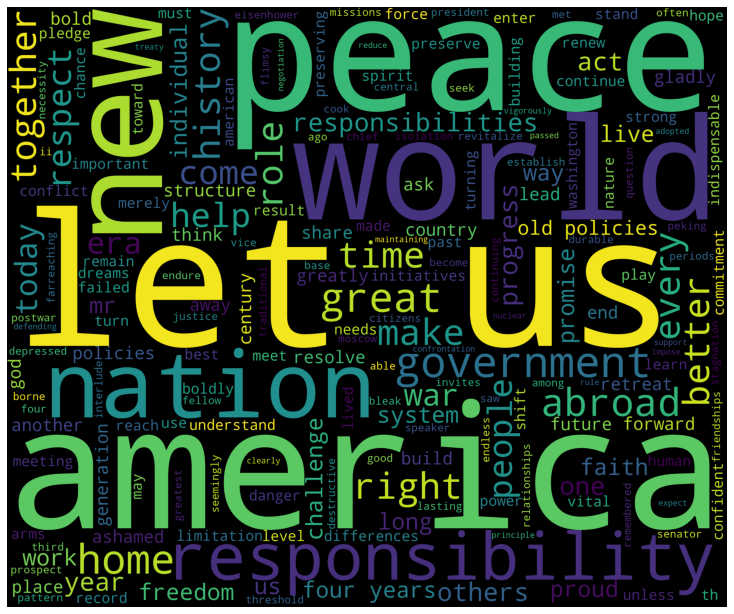

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(Nixon_new)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)
print("Word cloud for President Richard Nixon's inaugural address in 1973 ")
plt.show()



Word cloud for President John F. Kennedy's inaugural address in 1961 


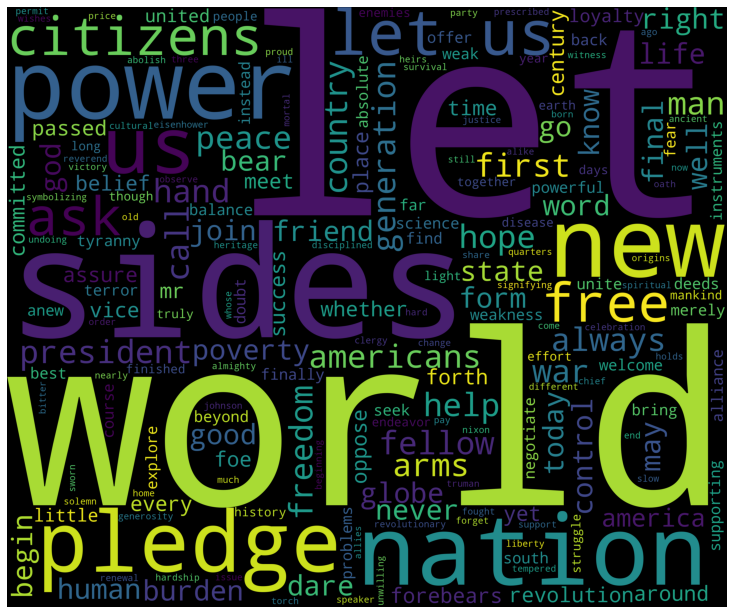

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(Kennedy_new)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)
print("Word cloud for President John F. Kennedy's inaugural address in 1961 ")
plt.show()



Word cloud for President Franklin D. Roosevelt's inaugural address in 1941 


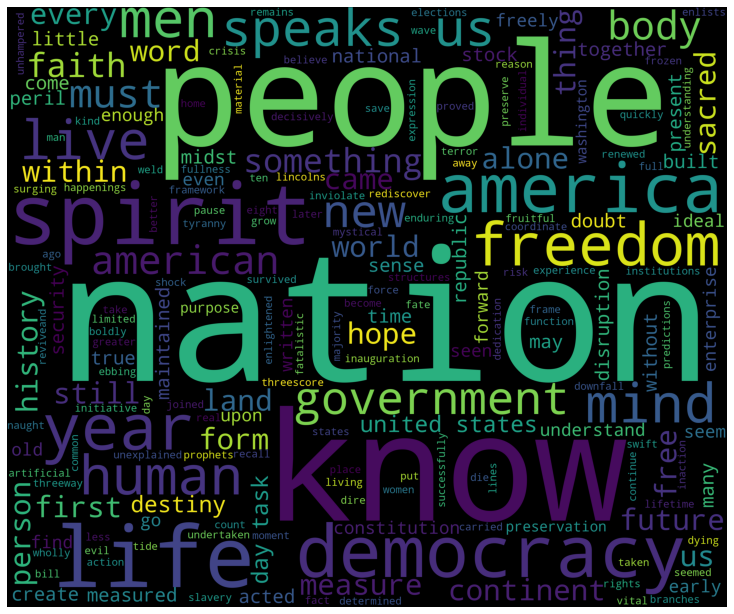

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(Roosevelt_new)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)
print("Word cloud for President Franklin D. Roosevelt's inaugural address in 1941 ")
plt.show()

